In [1]:
from sklearn.datasets import fetch_lfw_people # Descarga el dataset
faces = fetch_lfw_people(min_faces_per_person=60) # Guarda el dataset en una variable filtrando por personas con minimo 60 fotos 
print(faces.target_names) # Imprime los nombres de las personas 
print(faces.images.shape) # Imprime la cantidad de imagenes que hay 

['Ariel Sharon' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Junichiro Koizumi' 'Tony Blair']
(1041, 62, 47)


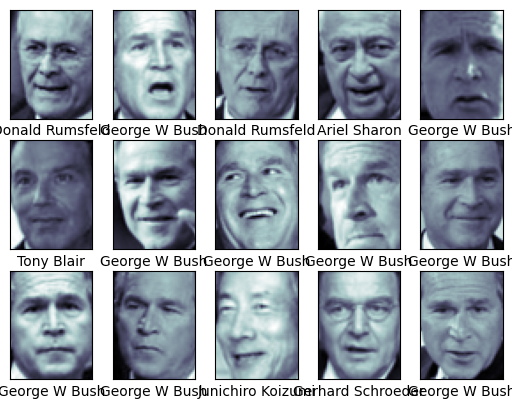

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])
    
# esta celda muestra ejemplos de las imagenes que quedaron del dataset,
# se especifica que sean 15,
# oculta ejes y pone el nombre de cada persona    

In [3]:

from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

La celda de arriba construye un pipeline con 2 pasos, el primero dice que seran 150 componentes, reduce la dimensionalidad e impone una semilla y el segundo determina el kernel y reescala las clases para que esten balanceadas

In [4]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

Divide en train y test

In [5]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

CPU times: user 2min 30s, sys: 34.6 s, total: 3min 5s
Wall time: 24.9 s
{'svc__C': 10, 'svc__gamma': 0.001}


Define unos valores para C y para gamma y utiliza una validación cruzada para determinar la mejor combinación 

In [6]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

predice en test con los parámetros optimizados 

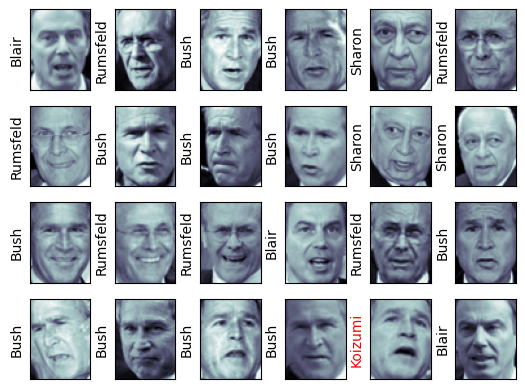

In [7]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')

Muestra 24 imágenes, nos podemos dar cuenta que el modelo solo no acerto en 1 ocación de esta muestra 

In [8]:

from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.94      0.76      0.84        21
  Donald Rumsfeld       0.62      0.92      0.74        26
    George W Bush       0.93      0.88      0.90       140
Gerhard Schroeder       0.78      0.86      0.82        21
Junichiro Koizumi       0.69      1.00      0.82         9
       Tony Blair       0.95      0.80      0.86        44

         accuracy                           0.86       261
        macro avg       0.82      0.87      0.83       261
     weighted avg       0.88      0.86      0.87       261



Son métricas para calificar nuestro modelo, cuantas prediiciones fueron correctas, cuantos verdaderos positivos recupero, accuracy global, promedios, media armónica entre precision y recall y cuantas instancias hay de cada clase en test

<Axes: >

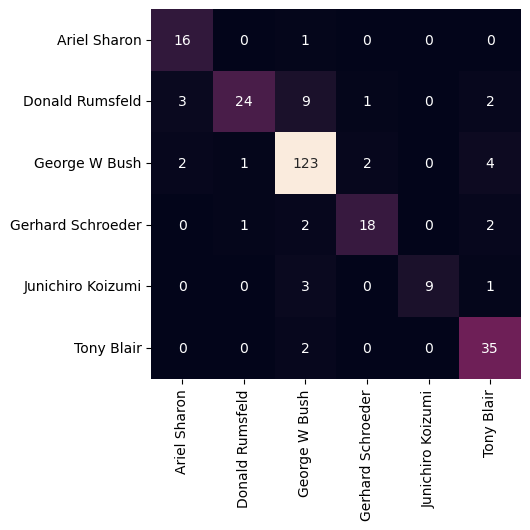

In [9]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)

Calcula una matriz de confusión y la grafica como mapa de calor, los valores que estan en la diagonal fueron los aciertos del modelo y los valores fuera de ella fueron las confusiones de mi modelo

In [10]:
from sklearn.datasets import load_digits

digits = load_digits()

print(digits.images.shape)
print(digits.target_names)


(1797, 8, 8)
[0 1 2 3 4 5 6 7 8 9]


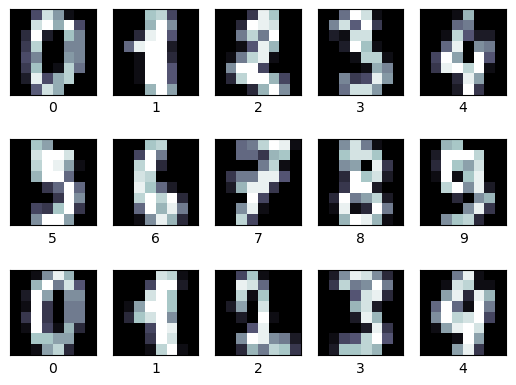

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=digits.target_names[digits.target[i]])


In [12]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=50, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [13]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target, random_state=42)

In [14]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)

CPU times: user 1min 1s, sys: 36.3 s, total: 1min 38s
Wall time: 12.8 s


GridSearchCV(estimator=Pipeline(steps=[('pca',
                                        PCA(n_components=50, random_state=42,
                                            whiten=True)),
                                       ('svc', SVC(class_weight='balanced'))]),
             param_grid={'svc__C': [1, 5, 10, 50],
                         'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]})

In [15]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

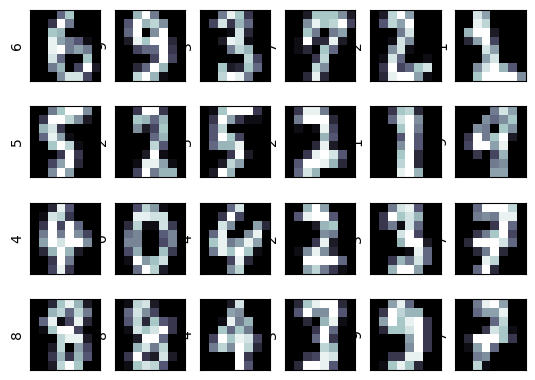

In [16]:

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(8, 8), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(digits.target_names[yfit[i]],
                   color='black' if yfit[i] == ytest[i] else 'red')

In [18]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.97      1.00      0.99        37
           2       0.97      1.00      0.99        38
           3       0.98      0.96      0.97        46
           4       1.00      1.00      1.00        55
           5       0.97      1.00      0.98        59
           6       1.00      0.98      0.99        45
           7       1.00      0.98      0.99        41
           8       0.97      0.97      0.97        38
           9       0.98      0.96      0.97        48

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



<Axes: >

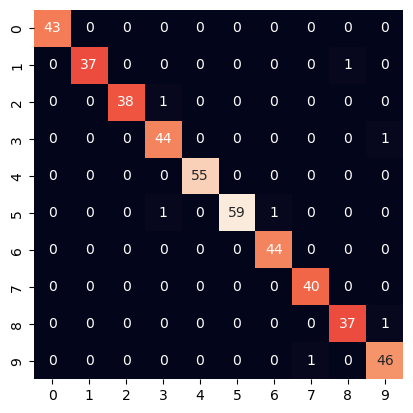

In [20]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)

#### 